# 7. előadás
*Tartalom:* Függvények, pár további hasznos library (import from ... import ... as szintaktika, time, random, math, regex (regular expressions), os, sys)

### Függvények

Találkozhattunk már függvényekkel más programnyelvek kapcsán. 

De valójában mik is azok a függvények? A függvények:

    • újrahasználható kódok
    • valamilyen specifikus feladatot végeznek el
    • flexibilisek
    • egyszer definiálandók
    • nem csinálnak semmit, amíg nem hívjuk meg őket

Hogyan definiálunk egy függvényt?


``` python
def fuggveny_neve(parameter1, parameter2, stb):
    # ide írjuk a kódot
    return visszatérési_érték_lista1, v_2, v_3 # opcionális! 
```

Ezt hívni a következőképp lehet:

``` python
a, b, c = fuggveny_neve(parameter1, parameter2 …)
# vagy, ha nem vagyunk kiváncsiak az összes visszatérési értékre
a, _, _ = fuggveny_neve(parameter1, parameter2 …)
```


Kezdjük egy egyszerű függvénnyel! Írjunk egy olyan függvényt, amely a `"Helló, <név>"` sztringet adja vissza:


In [1]:
def udvozlet(nev):
    print("Hello,", nev, end="!")

udvozlet("Tamás")

Hello, Tamás!

Egyes függvényeknek van paraméterük/argumentumuk, másoknak azonban nincs. Egyes esetekben a paraméteres függvények bizonyulhatnak megfelelőnek, pont a paraméterek nyújtotta flexibilitás miatt, más esetekben pedig pont a paraméter nélküli függvények használata szükséges.
Egyes függvényeknek sok visszatérési érékük van, másoknál elhagyható a `return`. 

Írjunk egy olyan `adat_generalas` függvényt, amely 3 paramétert fogad: a generálandó listák darabszámát, lépésközét és opcionálisan egy eltolás értéket, amit hozzáadunk a generált adatokhoz. Amenyyiben nem adjuk meg a 3. paramétert, az eltolást, úgy az alapértelmezett érték legyen `0`. A 3 visszatérsi érték az `X` adat, valamint a 2 `Y` adat (koszinusz és színusz).

In [2]:
import math

def adat_generalas(darab, lepes, eltolas = 0):
    x = [x * lepes for x in range(0, darab)]
    y_sin = [math.sin(x * lepes) + eltolas for x in range(0, darab)]
    y_cos = [math.cos(x * lepes) + eltolas for x in range(0, darab)]
    return x, y_sin, y_cos

Próbáljuk ki a fenti függvényt és jelezzük ki `plot`-ként.

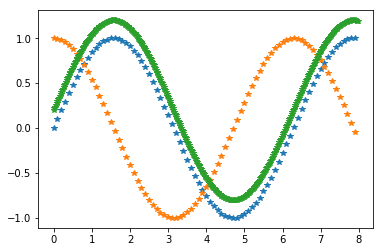

In [3]:
import matplotlib.pyplot as plt

x1, y1, y2 = adat_generalas(80, 0.1)
x2, y3, _  = adat_generalas(400, 0.02, 0.2)

plt.plot(x1, y1, "*")
plt.plot(x1, y2, "*")
plt.plot(x2, y3, "*")
plt.show()

A paraméterekkel rendelkező függvényeknél nagyon fontos a paraméterek sorrendje. Nem mindegy, hogy függvényhíváskor milyen sorrendben adjuk meg a paramétereket. Pl.:

In [4]:
def upload_events(events_file, location):
    # … (feltehetően a kód jön ide) …
    return

# Helytelen hívás!!!
upload_events("New York", "events.csv")
# Helyes hívás!!!
upload_events("events.csv", "New York")

Ha azonban nem kedveljük ezt a szabályt, akár át is hághatjuk úgy, hogy megmondjuk a függvénynek, melyik érték, melyik változóhoz tartozik!

In [5]:
# Így is helyes!!!
upload_events(location="New York", events_file="events.csv")

Fontos még megemlíteni a függvények visszatérési értékét. A függvények egy vagy több értéket adhatnak vissza a **return** parancsszó meghívásával. A nem meghatározott visszatérési érték az ún. **None**. Ezen kívül visszatérési érték lehet *szám, karakter, sztring, lista, könyvtár, TRUE, FALSE,* vagy bármilyen más típus.

In [6]:
# Egy érték vissza adása
def product(x, y):
    return x*y

product(5,6)

30

In [7]:
# Több érték vissza adása
def get_attendees(filename):
    # Ide jön a kód, amely vissza adja a „teacher”, „assistants” és „students” értékeket.
    #teacher, assistants, students = get_attendees("file.csv")
    return

## További hasznos könyvtárak:

#### Az *import* szintakszis

Ahhoz, hogy beépített függvényeket használjunk a kódban, szükség van azok elérésére. Ezek általában modulokban, vagy csomagokban találhatók. Ezeket az **import** kulcsszóval tudjuk beépíteni. Amikor a Python importálja pl. a *hello* nevű modult, akkor az interpreter először végig listázza a beépített modulokat, és ha nem találja ezek között, akkor elkezdi keresni a *hello.py* nevű fájlt azokban a mappákban, amelyeknek listáját a **sys.path** változótól kapja meg. Az importálás alapvető szintaktikája az **import** kulcsszóból és a beillesztendő modul nevéből áll.

**import hello**

Mikor importálunk egy modult, elérhetővé tesszük azt a kódunkban, mint egy különálló névteret (*namespace*). Ez azt jelenti, hogy amikor meghívunk egy függvényt, pont (.) jellel kell összekapcsolnunk a modulnévvel így: [modul].[függvény]

In [8]:
import random

random.randint(0,5) #meghívja a randint függvényt, ami egy random egész számot ad vissza

1

Nézzünk erre egy példát, amely 10 véletlenszerű egész számot ír ki!

In [9]:
import random

for i in range(10):
    print(random.randint(1, 25))

5
16
20
8
12
14
15
23
17
4


#### A *from … import …*  szintakszis

Általában akkor használjuk, mikor hivatkozni akarunk egy konkrét függvényre a modulból, így elkerüljük a ponttal való referálást. Nézzük az előző példát ezzel a megoldással:

In [10]:
from random import randint

for i in range(10):
    print(randint(1, 25))

7
19
3
14
18
3
8
7
16
5


#### Aliasok használata, az *import … as …*  szintakszis

Pythonban lehetőség van a modulok és azok függvényeinek átnevezésére az **as** kulcsszó segítségével, _ilyet már régebben is használtunk_. Pl.:

In [11]:
import math as m

Egyes hosszú nevű modulok helyett pl. általánosan megszokott az aliasok használata. Ilyet régóta használunk pl.:

In [12]:
import matplotlib.pyplot as plt

### A *time* és *datetime* könyvtárak:

A **time** modul alapvető idővel és dátummal kapcsolatos függvényeket tartalmaz. Két különböző megjelenítési formát használ és számos függvény segít ezeknek az oda-vissza konvertálásában:

   - **float** másodpercek száma – ez a UNIX belső megjelenítési formája. Ebben a megjelenítési formában az egyes időpontok között eltelt idő egy lebegőpontos szám.
   - **struct_time** oblektum – ez kilenc attribútummal rendelkezik egy időpont megjelenítésére, a Gergely naptár szerinti dátumkövetést alkalmazva. Ebben a formában nincs lehetőség két időpont között eltelt idő megjelenítésére, ilyenkor oda-vissza kell konvertálnunk a **float** és **struct_time** között.

A **datetime** modul tartalmaz minden szükséges objektumot és metódust, amelyek szükségesek lehetnek a Gergely naptár szerinti időszámítás helyes kezeléséhez. A **datetime** csak egyfajta időpont megjelenítési formát tartalmaz, ellenben négy olyan osztállyal rendelkezik, amelyekkel könnyedén kezelhetjük a dátumokat és időpontokat:

   - **datetime.time** – négy attribítummal rendelkezik, ezek az óra, perc, másodperc és a századmásodperc.
   - **datetime.date** – három attribútuma van, ezek az év, hónap és a nap.
   - **datetime.datetime** – ez kombinálni képes a **datetime.time** és **datetime.date** osztályokat.
   - **datetime.timedelta** – ez az eltelt időt mutatja meg két **date**, **time** vagy **datetime** között. Az értékei megjeleníthetők napokban, másodpercekben vagy századmásodpercekben.

Nézzünk néhány példát:

In [13]:
from datetime import date
print(date.today()) # aktuális napi dátum

2018-11-03


In [14]:
from datetime import datetime
print(datetime.now()) # pillanatnyi idő

2018-11-03 18:00:12.616984


Próbáljuk ki, hogy amennyiben két időpont között várunk 2 másodpercet, az ténylegesen pontosan mennyi eltelt időt jelent.

In [15]:
from datetime import timedelta
from time import sleep

t1 = datetime.now()
print(t1)
sleep(2) # várjunk 2 másodpercet
t2 = datetime.now()
print(t2)

print("Ténylegesen eltelt idő:", timedelta(minutes=(t2-t1).total_seconds())) # valamilyen eltelt idő

2018-11-03 18:00:12.672979
2018-11-03 18:00:14.674316
Ténylegesen eltelt idő: 0:02:00.080220


In [16]:
import time
time.clock() # másodpercek lebegőpontos ábrázolása. UNIX rendszeren a processzor időt, Windowson a függvény első hívásától eltelt időt mutatja fali óra szerint.

5e-07

### A *random* könytár:

Ez a könyvtár pszeudó-random generátorokat képes létrehozni. Nézzünk néhány konkrét példát:

In [17]:
from random import random
random() #random float [0, 1) között

0.803289050063443

In [18]:
from random import uniform
uniform(2.5, 10.0) #random float [2.5, 10.0) között

9.187722608197578

In [19]:
from random import expovariate
expovariate(1/10) # 1 osztva egy nem nulla értékű középértékkel

0.9930064020195424

In [20]:
from random import randrange
num1=randrange(10) # [0,9] közé eső random integer: randrange(stop)
num2=randrange(0, 101, 2) # [0,100] közé eső páros integer: randrange(start, stop, step)
num1, num2

(3, 98)

In [21]:
from random import choice
choice(['win', 'lose', 'draw']) # egy lista egyik random eleme

'draw'

In [22]:
from random import shuffle
deck = 'ace two three four'.split()
shuffle(deck) # elemek összekeverése
deck

['two', 'three', 'ace', 'four']

In [23]:
from random import sample
sample([10, 20, 30, 40, 50, 60, 70], k=4) #k=n darab elemet ad vissza a halmazból

[70, 20, 40, 10]

In [24]:
from random import randint
randint(1,10) # random integert ad [1,10] intervallumban

4

### A *math* könyvtár

Matematikai függvények használatát teszi lehetővé C szabvány alapján. Néhány konkrét példa:

In [25]:
import math
math.ceil(5.6) # lebegőpontos számok felkerekítése egész típusú számmá

6

In [26]:
math.factorial(10) # fatoriális számítás

3628800

In [27]:
math.floor(5.6) # lebegőpontos számok lefele kerekítése egész típusú számmá

5

In [28]:
math.gcd(122, 6) # visszaadja a két szám legnyagyobb közös osztóját

2

In [29]:
math.exp(2) # Euler-féle szám az x hatványra emelve

7.38905609893065

Ennek pythonban nem sok értelme van, ahatványozás megy a `**` művelettel is. (`2 ** 3`).

In [30]:
math.pow(2, 3) # pow(x,y): x az y hatványra emelve, rövidebben 2**3

8.0

In [31]:
math.sqrt(36) # négyzetgyökvonás, rövidebben 36**0.5

6.0

In [32]:
math.cos(0.5) # cosinus függvény radiánokban kifejezve, ugyanígy működik a math.sin(x) is.

0.8775825618903728

In [33]:
math.degrees(1) # radián-fok konverzió, ugyanígy math.radian(x) fok-radián átalakító.

57.29577951308232

Matematikai állandók:

In [34]:
print(math.pi) # Pi
print(math.e) # Euler-szám
print(math.inf) # végtelen
print(math.nan) # nem szám (not a number)

3.141592653589793
2.718281828459045
inf
nan


### Az *OS* könyvtár

Az OS modul alapvetően olyan függvényeket tartalmaz melyek az operációs rendszerrel kapcsolatos műveleteket támogatja. A modul beszúrása az **`import os`** paranccsal történik. Nézzünk néhány ilyen metódust:

In [35]:
import os
os.system("dir") # shell parancsot hajt végre, ha a parancs hatással van a kimentre, akkor ez nem jelenik meg

0

Visszatérésként csak `0`-t ad, ha sikeres és `1`-et, ha nem sikeres a művelet. De a konzolon megjelenik minden kimenet: 

```python

Directory of C:\Users\herno\Documents\GitHub\sze-academic-python\eload

2018-11-03  16:42    <DIR>          .
2018-11-03  16:42    <DIR>          ..
2018-10-24  06:16    <DIR>          .ipynb_checkpoints
2018-10-24  11:02    <DIR>          data
2018-10-24  06:16             5,846 ea00.md
2018-11-03  15:30            18,775 ea01.ipynb
2018-07-31  17:41            21,838 ea02.ipynb
2018-07-31  17:41            26,484 ea03.ipynb
2018-09-10  15:23           293,223 ea04.ipynb
2018-10-24  06:16           128,088 ea05.ipynb
2018-07-17  11:01            34,838 ea06.ipynb
2018-11-03  16:42            49,489 ea07.ipynb
2018-11-03  15:30            10,384 ea08.ipynb
2018-11-03  15:30           401,267 ea10.ipynb
```

In [36]:
os.getcwd() # kiírja az ektuális munkakönytárat

'C:\\Users\\herno\\Documents\\GitHub\\sze-academic-python\\eload'

In [37]:
os.getpid() # ez a futó folyamat ID-jét írja ki

12324

A további példák nem kerülnek lefuttatásra, csak felsoroljuk őket:

1) `os.chroot(path)` - a folyamat root könytárának megváltoztatása `'path'` elérésre

2) `os.listdir(path)` - belépések száma az adott könytárba

3) `os.mkdir(path)` - könyvtár létrehozása a `'path'` útvonalon

4) `os.remove(path)` - a `'path'`-ban levő fájl törlése

5) `os.removedirs(path)` - könyvtárak rekurzív törlése

6) `os.rename(src, dst)` - az `'src'` átnevezése `'dst'`-re, ez lehet fájl vagy könyvtár

### A *sys* könyvtár

A **sys** modul különféle információval szolgál az egyes Python interptreterrel kapcsolatos konstansokról, függvényekről és metódusokról. 

In [38]:
import sys

sys.stderr.write('Ez egy stderr szoveg\n') # stderr kimenetre küld hibaüzenetet
sys.stderr.flush() # a pufferben eltárolt tartalmat flush-olja a kimenetre
sys.stdout.write('Ez egy stdout szoveg\n') # szöveget küld az stdout-ra

Ez egy stderr szoveg


Ez egy stdout szoveg


In [39]:
print ("script name is", sys.argv[0]) # az 'argv' tartalmazza a parancssori argumentumokat,
                                    # ezen belül az argv[0] maga a szkript neve

script name is c:\users\herno\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py


In [40]:
print ("Az elérési útvonalon", len(sys.path), "elem van.") # lekérdezzük a 'path'-ban levő elemek számát
sys.path # kiíratjuk a 'path'-ban levő elemeket

Az elérési útvonalon 8 elem van.


['',
 'c:\\users\\herno\\appdata\\local\\programs\\python\\python35\\python35.zip',
 'c:\\users\\herno\\appdata\\local\\programs\\python\\python35\\DLLs',
 'c:\\users\\herno\\appdata\\local\\programs\\python\\python35\\lib',
 'c:\\users\\herno\\appdata\\local\\programs\\python\\python35',
 'c:\\users\\herno\\appdata\\local\\programs\\python\\python35\\lib\\site-packages',
 'c:\\users\\herno\\appdata\\local\\programs\\python\\python35\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\herno\\.ipython']

``` python
print(sys.modules.keys()) # kiíratjuk az importált modulok neveit
```
```
dict_keys(['pkgutil', '__future__', 'filecmp', 'mpl_toolkits', 'platform', 'distutils.debug', 'jedi.evaluate.context', 'ctypes._endian', 'msvcrt', 'parso.pgen2.parse', '_stat', 'jedi.evaluate', '_pickle', 'parso.python.pep8', 'jedi.evaluate.context.module', 'distutils.log', 'collections', 
......
```

In [41]:
print (sys.platform) # lekérdezzük a platformunk típusát

win32


``` python
print("hello")

sys.exit(1) # nem lép ki egyből, hanem meghívja a 'SystemExit' kivételt. Ennek kezelésére látsd a következő példát.

print("there")

Output:
hello
SystemExit: 1
``` 

In [42]:
print ("hello")

try: # 'try'-al kezeljük a 'SystemExit' kivételt
    sys.exit(1)
except SystemExit:
    pass

print ("there")

hello
there


### A reguláris kifejezések: *regex*


Számos helyzetben kell sztringeket feldolgoznunk. Ezek a sztringek azonban nem mindig érkeznek egyből értelmezhető formában, vagy nem követnek semmilyen mintát. Ilyenkor elég nehéz ezek feldolgozása. Erre nyújt egy elfogadható megoldást a reguláris kifejezések alkalmazása. A **reguláris kifejezés** tehát egy minta, vagy mintasorozat, amelynek segítségével könnyebben feldolgozhatjuk az egy adott halmazhoz tartozó adatokat, melyeknek egy közös mintát kellene követniük. Nézzünk egy példát!

Ha pl. a minta szabályom az "aba" szócska, akkor minden olyan sztring, amely megfelel az "aba" formátumnak, beletartozik a halmazba. Egy ilyen egyszerű szabály azonban csak egyszerű sztringeket képes kezelni.

Egy összetettebb szabály, mint pl. a "ab&ast;a" már sokkal több kimeneti lehetőséget nyújt. Lényegében, sztringek végtelen halmazát képes generálni, olyanokat mint: "aa", "aba", "abba", stb. Itt már kicsit nehezebb ellenőrizni, hogy a generált sztring ebből a szabályból származik-e. 

#### Néhány alapszabályt a reguláris kifejezések létrehozásával kapcsolatban

- Bármely hagyományos karakter, akár önmagában is reguláris kifejezést alkothat
- A '.' karakter bármely egyedülálló karakternek megfelelhet. Pl. az "x.y"-nak megfelelhet a "xay", "xby", stb., de a "xaby" már NEM.
- A szögletes zárójelek [...] olyan szabályt definiálnak, amely alapján az adott elem megfelel a zárójelben levő halmaznak. Pl. a "x[abc]z"-nak megfelelhet az "xaz", "xbz" és az "xcz" is. Vagy pl. az "x[a-z]z" mintában a középső karakter az ABC bármely betűje lehet. Ilyenkor az intervallumot kötőjellel '-' jelöljük meg.
- A '^' jellel módosított szögletes zárójelek [^...] azt jelentik, hogy a reguláris kifejezésben a zárójelben felsoroltakon kívűl minden más szerepelhet. Pl. a "1[^2-8]2" kifejezésben a zárójel helyén csak '1' és '9' lehet, mert a "2-8" közötti intervallumot kizártuk.
- Több reguláris kifejezést csoportosíthatunk zárójelek (...) segítségével. Pl. a "(ab)c" szabály az "ab" és 'c' reguláris kifejezések csoportosítása.
- A reguláris kifejezések ismétlődhetnek. Pl. a "x&ast;" megismételheti a 'x'-t nullászor, vagy ennél többször, a "x+" megismétli az 'x'-t 1 vagy annál többször, a "x?" megismétli 'x'-t 0 vagy 1 alkalommal. Konkrét példa: a "1(abc)&ast;2" kifejezésnek megfelelhet a "12", "1abc2", és akár a "1abcabcabc2" is.
- Ha valamilyen szabály a sor elején kezdődik, akkor azt "^" mintával jelöljük, ha a sor végén található, akkor pedig a "^&dollar;" mintával.

#### A reguláris kifejezések alkalmazása Pythonban

A reguláris kifejezések alkalmazásához be kell szúrnunk a **re** könyvtárat. Nézzünk ezzel kapcsolatban néhány konkrét feladatot:

In [43]:
import re
szov1 = "2019 november 12"
print("Minden szám:", re.findall("\d+", szov1))
print("Minden egyéb:", re.findall("[^\d+]", szov1))
print("Angol a-z A-Z:", re.findall("[a-zA-Z]+", szov1))

Minden szám: ['2019', '12']
Minden egyéb: [' ', 'n', 'o', 'v', 'e', 'm', 'b', 'e', 'r', ' ']
Angol a-z A-Z: ['november']


In [44]:
szov2 = "<body>Ez egy példa<br></body>"
print(re.findall("<.*?>", szov2))

['<body>', '<br>', '</body>']


In [45]:
szov3 = "sör sört sár sír sátor Pártol Piros Sanyi Peti Pite Pete "
print("s.r      :", re.findall("s.r", szov3))
print("s.r.     :", re.findall("s.r.", szov3))
print("s[áí]r   :", re.findall("s[áí]r", szov3))
print("P.t.     :", re.findall("P.t.", szov3))
print("P.*t.    :", re.findall("P.*t.", szov3))
print("P.{0,3}t.:", re.findall("P.{0,3}t.", szov3))

s.r      : ['sör', 'sör', 'sár', 'sír']
s.r.     : ['sör ', 'sört', 'sár ', 'sír ']
s[áí]r   : ['sár', 'sír']
P.t.     : ['Peti', 'Pite', 'Pete']
P.*t.    : ['Pártol Piros Sanyi Peti Pite Pete']
P.{0,3}t.: ['Párto', 'Peti', 'Pite', 'Pete']


Nézzünk egy összetettebb példát:

In [46]:
fajl_lista = [    "valami_S015_y001.png",
                  "valami_S015_y001.npy",
                  "valami_S014_y001.png",
                  "valami_S014_y001.npy",
                  "valami_S013_y001.png",
                  "valami_S013_y001.npy",
                  "_S999999_y999.npy"]

r1 = re.compile(r"_S\d+_y\d+\.png")
r2 = re.compile(r"_S\d+_y\d+\..*")
f1 = list(filter(r1.search, fajl_lista))
f2 = list(filter(r2.search, fajl_lista))
print("_S\d+_y\d+\.png \n---------------")
for f in f1: print(f)
print(""); print("_S\d+_y\d+\..* \n---------------")
for f in f2: print(f)


_S\d+_y\d+\.png 
---------------
valami_S015_y001.png
valami_S014_y001.png
valami_S013_y001.png

_S\d+_y\d+\..* 
---------------
valami_S015_y001.png
valami_S015_y001.npy
valami_S014_y001.png
valami_S014_y001.npy
valami_S013_y001.png
valami_S013_y001.npy
_S999999_y999.npy


További információt a reguláris kifejezésekkel kapcsolatban [ITT](https://www.regular-expressions.info/index.html) találnak.

## _Used sources_ / Felhasznált források:
   - [Shannon Turner: Python lessons repository](https://github.com/shannonturner/python-lessons) MIT license (c) Shannon Turner 2013-2014,
   - [Siki Zoltán: Python mogyoróhéjban](http://www.agt.bme.hu/gis/python/python_oktato.pdf) GNU FDL license (c) Siki Zoltán,
   - [BME AUT](https://github.com/bmeaut) MIT License Copyright (c) BME AUT 2016-2018,
   - [Python Software Foundation documents](https://docs.python.org/3/) Copyright (c), Python Software Foundation, 2001-2018,
   - [Regular expressions](https://www.regular-expressions.info/index.html) Copyright (c) 2003-2018 Jan Goyvaerts. All rights reserved.